In [2]:
import pandas as pd

# Load the dataset
file_path = "/content/MLTempDataset.csv"  # Path from the uploaded file
df = pd.read_csv(file_path)

# Display first few rows
df.head()

,Unnamed: 0,Datetime1,DAYTON_MW,Datetime
0,0,0,20.867,2022-01-04 00:00:00
1,1,1,21.000,2022-01-04 01:00:00
2,2,2,20.867,2022-01-04 02:00:00
3,3,3,20.650,2022-01-04 03:00:00
4,4,4,20.400,2022-01-04 04:00:00


In [8]:
from google.colab import files
uploaded = files.upload()


Saving MLTempDataset.csv to MLTempDataset (1).csv


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
<ipython-input-11-71644e9ebe9e>:43: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  plt.plot(pd.date_range(data.index[-1], periods=25, freq='H')[1:], forecast_df_unscaled['DAYTON_MW'],


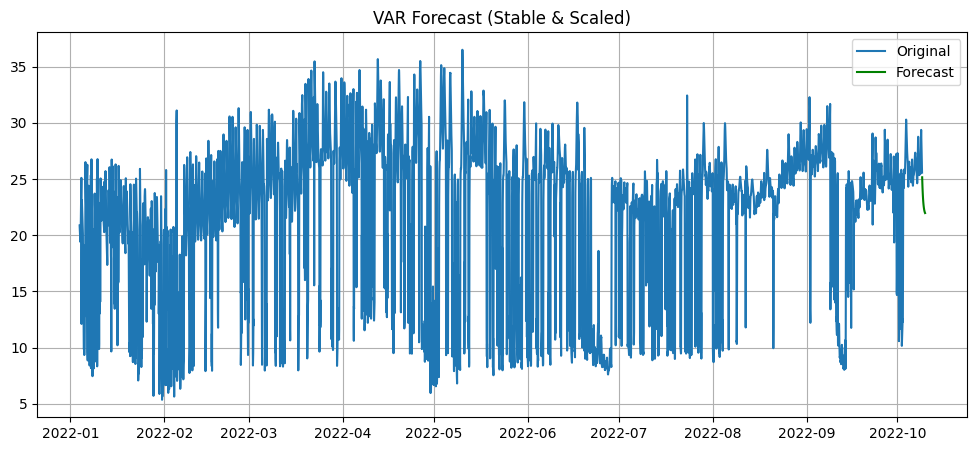

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('MLTempDataset (2).csv')
df['Datetime'] = pd.to_datetime(df['Datetime'])
df.set_index('Datetime', inplace=True)

# Create lagged variables to make it multivariate
df['Lag1'] = df['DAYTON_MW'].shift(1)
df['Lag2'] = df['DAYTON_MW'].shift(2)
df.dropna(inplace=True)

# Select the multivariate time series
data = df[['DAYTON_MW', 'Lag1', 'Lag2']]

# Standardize (helps with stability)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_df = pd.DataFrame(scaled_data, index=data.index, columns=data.columns)

# Fit the VAR model
model = VAR(scaled_df)

# Try lower lag value to avoid instability
results = model.fit(maxlags=5, ic='aic')

# Forecast 24 steps ahead
forecast_input = scaled_df.values[-results.k_ar:]
forecast = results.forecast(y=forecast_input, steps=24)

# Inverse scaling
forecast_df = pd.DataFrame(forecast, columns=scaled_df.columns)
forecast_unscaled = scaler.inverse_transform(forecast_df)
forecast_df_unscaled = pd.DataFrame(forecast_unscaled, columns=data.columns)

# Plot original and forecasted DAYTON_MW
plt.figure(figsize=(12, 5))
plt.plot(data['DAYTON_MW'], label='Original')
plt.plot(pd.date_range(data.index[-1], periods=25, freq='H')[1:], forecast_df_unscaled['DAYTON_MW'],
         label='Forecast', color='green')
plt.title("VAR Forecast (Stable & Scaled)")
plt.legend()
plt.grid()
plt.show()
